In [1]:
import os
import importlib
import pandas as pd

from utils import constants as cst

importlib.reload(cst)

<module 'utils.constants' from '/home/ec2-user/SageMaker/hackathon-repo-group07/thomas/utils/constants.py'>

In [2]:
# Import climate matrix
climate_matrix_filename = f"climate_matrix_yearly.csv"
climate_matrix = pd.read_csv(
    os.path.join(cst.FOLDER_PROCESSED_DATA, climate_matrix_filename)
).set_index(["NUTS_ID", "YEAR"])

In [3]:
# Import additional climate metrics
hwi_per_year = pd.read_csv(
    os.path.join(cst.FOLDER_PROCESSED_DATA, "hw_per_year.csv")
).set_index(["NUTS_ID", "YEAR"])

hwi_month = pd.read_csv(
    os.path.join(cst.FOLDER_PROCESSED_DATA, "hw_month.csv")
).set_index(["NUTS_ID", "YEAR"])

hwi_avg = pd.read_csv(os.path.join(cst.FOLDER_PROCESSED_DATA, "avg_hwi.csv")).set_index(
    ["NUTS_ID", "YEAR"]
)

hw_len_avg = pd.read_csv(
    os.path.join(cst.FOLDER_PROCESSED_DATA, "avg_hw_len.csv")
).set_index(["NUTS_ID", "YEAR"])

In [4]:
# Variables types
climate_matrix.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

In [5]:
# Compile summary statistics
summary_statistics_df = pd.concat(
    [climate_matrix[column].describe() for column in climate_matrix.columns], axis=1
)

In [6]:
summary_statistics_df

spi01_min     spi03_min     spi06_min     spi12_min       lfi_min  \
count  23958.000000  23958.000000  23958.000000  23958.000000  20124.000000   
mean      -1.646078     -1.398844     -1.148814     -0.838894      0.001593   
std        0.677463      0.678298      0.780493      0.841356      0.030140   
min       -4.140000     -3.575000     -3.730000     -3.310000      0.000000   
25%       -2.035000     -1.840000     -1.670000     -1.425000      0.000000   
50%       -1.570000     -1.385000     -1.130000     -0.842000      0.000000   
75%       -1.151625     -0.940000     -0.625000     -0.263125      0.000000   
max        0.269000      0.951000      1.436000      2.069000      0.923000   

           tmax_min    fapar_min       sma_min    spi01_mean    spi03_mean  \
count  20652.000000  8841.000000  23922.000000  23958.000000  23958.000000   
mean       3.760714    -0.901785     -1.114894      0.009023      0.005200   
std        4.784486     0.513172      0.801087      0.307415      0.498831   
min      -17.788000    -3.037000     -4.620000     -1.020833     -1.598000   
25%        0.803000    -1.265000     -1.517000     -0.174833     -0.315000   
50%        3.633000    -0.870000     -1.013000      0.029958      0.020833   
75%        6.487000    -0.535000     -0.595000      0.215979      0.340448   
max       22.812000     0.818000      1.053000      1.057833      1.621500   

       ...  drg_man_s_04  drg_man_s_05  drg_man_s_06  drg_man_s_07  \
count  ...  23958.000000  23958.000000  23958.000000  23958.000000   
mean   ...      0.006261      0.007388      0.010769      0.018741   
std    ...      0.078880      0.085637      0.103215      0.135612   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

       drg_man_s_08  drg_man_s_09  drg_man_s_10  drg_man_s_11  drg_man_s_12  \
count  23958.000000  23958.000000  23958.000000  23958.000000  23958.000000   
mean       0.020119      0.013649      0.019451      0.020912      0.019159   
std        0.140409      0.116031      0.138106      0.143091      0.137085   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       spi12_yearly  
count  23958.000000  
mean       0.099422  
std        0.972255  
min       -3.170000  
25%       -0.558000  
50%        0.144000  
75%        0.760000  
max        3.165000  

[8 rows x 85 columns]

In [22]:
summary_statistics_df.columns.to_list()

['spi01_min',
 'spi03_min',
 'spi06_min',
 'spi12_min',
 'lfi_min',
 'tmax_min',
 'fapar_min',
 'sma_min',
 'spi01_mean',
 'spi03_mean',
 'spi06_mean',
 'spi12_mean',
 'lfi_mean',
 'tmax_mean',
 'fapar_mean',
 'sma_mean',
 'spi01_median',
 'spi03_median',
 'spi06_median',
 'spi12_median',
 'lfi_median',
 'tmax_median',
 'fapar_median',
 'sma_median',
 'spi01_max',
 'spi03_max',
 'spi06_max',
 'spi12_max',
 'lfi_max',
 'tmax_max',
 'fapar_max',
 'sma_max',
 'drg_agr_w',
 'drg_agr_s',
 'drg_man_w',
 'drg_man_s',
 'drg_agr_w_01',
 'drg_agr_w_02',
 'drg_agr_w_03',
 'drg_agr_w_04',
 'drg_agr_w_05',
 'drg_agr_w_06',
 'drg_agr_w_07',
 'drg_agr_w_08',
 'drg_agr_w_09',
 'drg_agr_w_10',
 'drg_agr_w_11',
 'drg_agr_w_12',
 'drg_agr_s_01',
 'drg_agr_s_02',
 'drg_agr_s_03',
 'drg_agr_s_04',
 'drg_agr_s_05',
 'drg_agr_s_06',
 'drg_agr_s_07',
 'drg_agr_s_08',
 'drg_agr_s_09',
 'drg_agr_s_10',
 'drg_agr_s_11',
 'drg_agr_s_12',
 'drg_man_w_01',
 'drg_man_w_02',
 'drg_man_w_03',
 'drg_man_w_04',
 'drg_ma

In [24]:
# Compile additional summary statistics
additional_data_df = pd.concat(
    [
        hwi_per_year,
        hwi_month,
        hwi_avg,
        hw_len_avg,
    ],
    axis=1,
)

additional_statistics_df = additional_data_df.describe()

<Axes: xlabel='YEAR'>

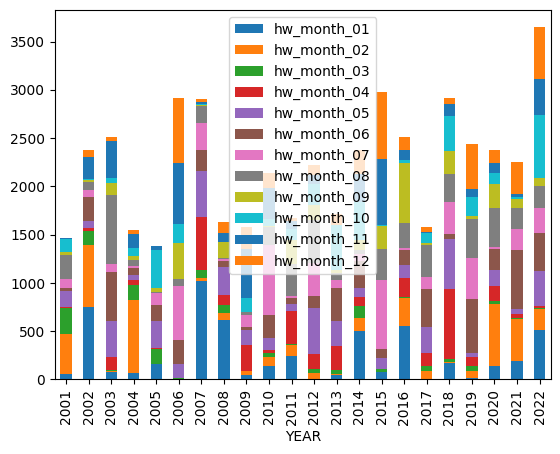

In [34]:
hw_cols = additional_data_df.columns[
    additional_data_df.columns.str.startswith("hw_month")
]

additional_data_df[hw_cols].reset_index().groupby("YEAR")[hw_cols].sum().plot.bar(stacked=True)

In [25]:
additional_statistics_df

yearly_hw   hw_month_01   hw_month_02   hw_month_03   hw_month_04  \
count  32670.000000  23773.000000  23773.000000  23773.000000  23773.000000   
mean       1.812519      0.226644      0.174778      0.058638      0.143692   
std        1.771244      0.418669      0.379785      0.234951      0.350785   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.000000      0.000000      0.000000      0.000000      0.000000   
75%        3.000000      0.000000      0.000000      0.000000      0.000000   
max       18.000000      1.000000      1.000000      1.000000      1.000000   

        hw_month_05   hw_month_06   hw_month_07   hw_month_08   hw_month_09  \
count  23773.000000  23773.000000  23773.000000  23773.000000  23773.000000   
mean       0.196273      0.215034      0.199133      0.207715      0.123417   
std        0.397186      0.410854      0.399357      0.405680      0.328923   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        hw_month_10   hw_month_11   hw_month_12  avg_hw_intensity  \
count  23773.000000  23773.000000  23773.000000      23773.000000   
mean       0.158078      0.183948      0.180499          2.018783   
std        0.364822      0.387450      0.384611          0.852207   
min        0.000000      0.000000      0.000000          0.021717   
25%        0.000000      0.000000      0.000000          1.413473   
50%        0.000000      0.000000      0.000000          1.949129   
75%        0.000000      0.000000      0.000000          2.536824   
max        1.000000      1.000000      1.000000          8.529575   

         avg_len_hw  
count  32670.000000  
mean       1.377818  
std        1.257919  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        2.000000  
max       20.000000

In [21]:
additional_statistics_df.columns.to_list()

['yearly_hw',
 'hw_month_01',
 'hw_month_02',
 'hw_month_03',
 'hw_month_04',
 'hw_month_05',
 'hw_month_06',
 'hw_month_07',
 'hw_month_08',
 'hw_month_09',
 'hw_month_10',
 'hw_month_11',
 'hw_month_12',
 'avg_hw_intensity',
 'avg_len_hw']

In [10]:
selected_columns = [
    "spi01_mean",
    "spi03_mean",
    "spi06_mean",
    "spi12_mean",
    "fapar_mean",
    "fapar_mean",
    "sma_mean",
    "lfi_max",
]

In [11]:
summary_statistics_df[selected_columns]

spi01_mean    spi03_mean    spi06_mean    spi12_mean   fapar_mean  \
count  23958.000000  23958.000000  23958.000000  23958.000000  8841.000000   
mean       0.009023      0.005200      0.022701      0.062463     0.172479   
std        0.307415      0.498831      0.623231      0.750325     0.349855   
min       -1.020833     -1.598000     -1.861667     -2.512083    -1.814167   
25%       -0.174833     -0.315000     -0.413833     -0.434979    -0.057455   
50%        0.029958      0.020833      0.014750      0.015500     0.195636   
75%        0.215979      0.340448      0.447708      0.567969     0.415500   
max        1.057833      1.621500      2.143500      2.654667     1.569273   

        fapar_mean      sma_mean       lfi_max  
count  8841.000000  23922.000000  20124.000000  
mean      0.172479      0.007124      0.435290  
std       0.349855      0.492259      0.384697  
min      -1.814167     -2.238750      0.000000  
25%      -0.057455     -0.292812      0.000000  
50%       0.195636      0.042750      0.455000  
75%       0.415500      0.346917      0.823000  
max       1.569273      1.637000      0.999000